In [1]:
import math
import numpy as np
from random import seed
from random import randint
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets.samples_generator import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

/Users/dogukan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

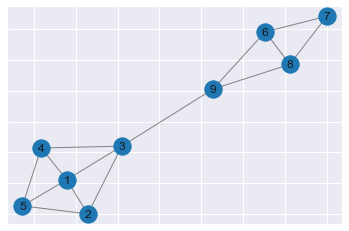

In [68]:
G1 = nx.Graph()
G1.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [2, 5],
    [3, 4],
    [4, 5],
    [1, 5],
    [6, 7],
    [7, 8],
    [6, 8],
    [9, 8],
    [9, 6],
[3,9]])
draw_graph(G1)
W1 = nx.adjacency_matrix(G1)
#print(W1.todense())

In [57]:
print('adjacency matrix:')
print(W1.todense())
# degree matrix
D1 = np.diag(np.sum(np.array(W1.todense()), axis=1))
print('degree matrix:')
print(D1)
# laplacian matrix
L1 = D1 - W1
print('laplacian matrix:')
print(L1)

adjacency matrix:
[[0 1 1 1 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 1]
 [1 0 1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 1]
 [0 0 1 0 0 1 0 1 0]]
degree matrix:
[[4 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 3]]
laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0]
 [-1  3 -1  0 -1  0  0  0  0]
 [-1 -1  4 -1  0  0  0  0 -1]
 [-1  0 -1  3 -1  0  0  0  0]
 [-1 -1  0 -1  3  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1 -1]
 [ 0  0  0  0  0 -1  2 -1  0]
 [ 0  0  0  0  0 -1 -1  3 -1]
 [ 0  0 -1  0  0 -1  0 -1  3]]


In [58]:
e1, v1 = np.linalg.eig(L1)
# eigenvalues
print('eigenvalues:')
print(e1)
# eigenvectors
print('eigenvectors:')
print(v1)

eigenvalues:
[-0.000 0.280 2.284 5.670 5.000 3.434 4.331 3.000 4.000]
eigenvectors:
[[0.333 0.309 0.059 0.281 0.816 0.095 -0.189 0.000 -0.000]
 [0.333 0.309 0.059 0.281 -0.408 0.095 -0.189 -0.707 -0.000]
 [0.333 0.190 -0.266 -0.715 -0.000 0.520 0.015 -0.000 -0.000]
 [0.333 0.309 0.059 0.281 -0.408 0.095 -0.189 0.707 0.000]
 [0.333 0.341 0.249 -0.315 -0.000 -0.656 0.425 0.000 0.000]
 [0.333 -0.392 -0.094 -0.113 -0.000 -0.262 -0.381 0.000 -0.707]
 [0.333 -0.456 0.661 0.061 -0.000 0.366 0.327 -0.000 0.000]
 [0.333 -0.392 -0.094 -0.113 -0.000 -0.262 -0.381 -0.000 0.707]
 [0.333 -0.218 -0.634 0.352 0.000 0.010 0.561 -0.000 0.000]]


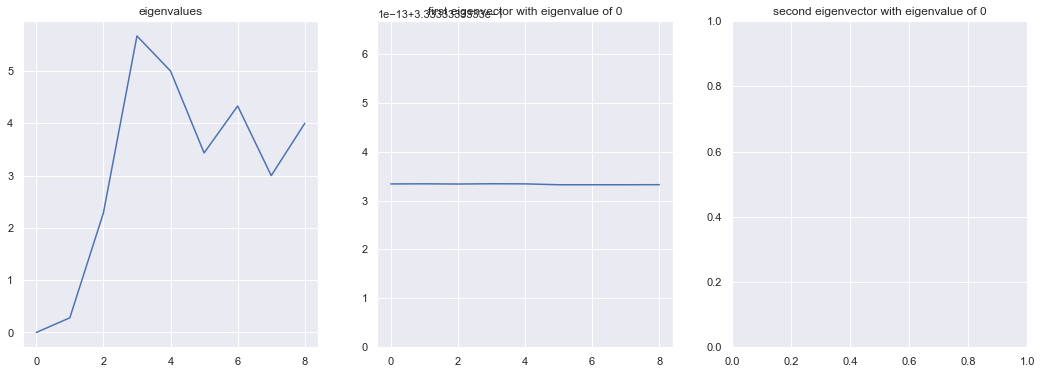

In [59]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(131)
plt.plot(e1)
ax1.title.set_text('eigenvalues')
i = np.where(e1 < 10e-6)[0]
ax2 = plt.subplot(132)
plt.plot(v1[:, i[0]])
ax2.title.set_text('first eigenvector with eigenvalue of 0')
ax3 = plt.subplot(133)
#plt.plot(v1[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue of 0')


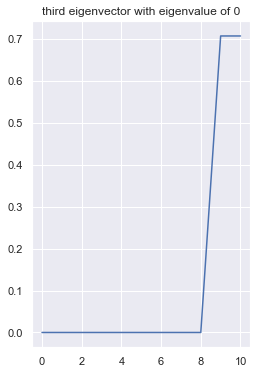

In [14]:
fig = plt.figure(figsize=[18, 6])
ax4 = plt.subplot(141)
plt.plot(v1[:, i[2]])
ax4.title.set_text('third eigenvector with eigenvalue of 0')

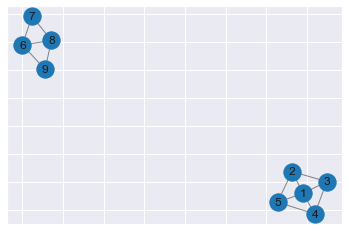

In [69]:
G2 = nx.Graph()
G2.add_edges_from([
    [1, 2],
    [1, 3],
    [1, 4],
    [2, 3],
    [2, 5],
    [3, 4],
    [4, 5],
    [1, 5],
    [6, 7],
    [7, 8],
    [6, 8],
    [9, 8],
    [9, 6]])
draw_graph(G2)
W2 = nx.adjacency_matrix(G2)
#print(W1.todense())

In [70]:
print('adjacency matrix:')
print(W2.todense())
# degree matrix
D2 = np.diag(np.sum(np.array(W2.todense()), axis=1))
print('degree matrix:')
print(D2)
# laplacian matrix
L2 = D2 - W2
print('laplacian matrix:')
print(L2)

adjacency matrix:
[[0 1 1 1 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 1]
 [0 0 0 0 0 1 0 1 0]]
degree matrix:
[[4 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 2]]
laplacian matrix:
[[ 4 -1 -1 -1 -1  0  0  0  0]
 [-1  3 -1  0 -1  0  0  0  0]
 [-1 -1  3 -1  0  0  0  0  0]
 [-1  0 -1  3 -1  0  0  0  0]
 [-1 -1  0 -1  3  0  0  0  0]
 [ 0  0  0  0  0  3 -1 -1 -1]
 [ 0  0  0  0  0 -1  2 -1  0]
 [ 0  0  0  0  0 -1 -1  3 -1]
 [ 0  0  0  0  0 -1  0 -1  2]]


In [71]:
e2, v2 = np.linalg.eig(L2)
# eigenvalues
print('eigenvalues:')
print(e2)
# eigenvectors
print('eigenvectors:')
print(v2)

eigenvalues:
[5.000 0.000 3.000 5.000 3.000 4.000 0.000 4.000 2.000]
eigenvectors:
[[0.894 -0.447 0.000 0.157 -0.000 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 -0.702 0.453 0.279 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 -0.081 -0.532 -0.650 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 0.702 0.453 -0.279 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 0.081 -0.532 0.650 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.866 -0.500 -0.157 0.000]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 0.454 -0.707]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 -0.751 0.000]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 0.454 0.707]]


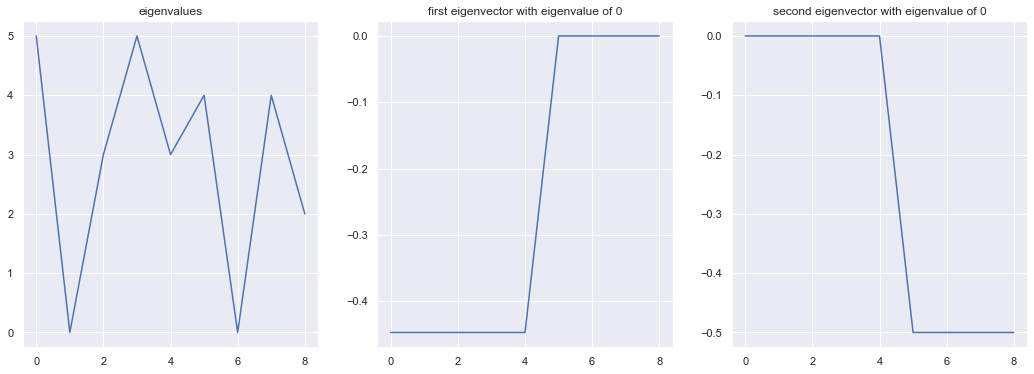

In [72]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(131)
plt.plot(e2)
ax1.title.set_text('eigenvalues')
i = np.where(e2 < 10e-6)[0]
ax2 = plt.subplot(132)
plt.plot(v2[:, i[0]])
ax2.title.set_text('first eigenvector with eigenvalue of 0')
ax3 = plt.subplot(133)
plt.plot(v2[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue of 0')